In [1]:
import cv2
import os
import utils
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.join('.', 'data_road','training')
# data_path = os.path.join('E:', '595DeepLearning', 'TermProject', 'data_road','training')
training_data_path = os.path.join(data_path, "image_2")
label_data_path = os.path.join(data_path, "gt_image_2")

label_files = [os.path.join(label_data_path, x) for x in os.listdir(label_data_path)]

label = cv2.imread(label_files[0])
labelnp = utils.preprocessdata(label)

In [5]:
import numpy as np

filelist = utils.getfilelist()
total_files = filelist.shape[0]
stride = (60, 20)
input_size = (600,160)
X = 0
Y = 1

processed_dir = os.path.join('data_road', 'processed_images')
i = 0
for row in filelist:
    image = cv2.imread(row[0])
    label = cv2.imread(row[1])
    if i % 10 == 0:
        print(f'On image {i} of {total_files}')
    i = i+1

    # save the 0.5 scale image and its label
    label_np = utils.preprocessdata(label)
    half_image = cv2.resize(image, dsize=input_size)
    half_label = cv2.resize(label_np, dsize=(1,input_size[X])).reshape(input_size[X])
    basename = os.path.basename(row[0])
    split_name = basename.split('.')
    name = f'{split_name[0]}_half.jpg'
    cv2.imwrite(os.path.join(processed_dir, name), half_image)
    labelbasename = os.path.basename(row[1])
    split_label_name = labelbasename.split('.')
    name = os.path.join(processed_dir, f'{split_label_name[0]}_half.npy')
    np.save(name,half_label)

    del(half_image)
    del(half_label)

    # create a sliding window and save the results
    end_y = input_size[Y]
    crop_i = 0
    while end_y < image.shape[0]:
        end_x = input_size[X]
        while end_x < image.shape[1]:
            start_y = end_y - input_size[Y]
            start_x = end_x - input_size[X]
            crop_image = image[start_y:end_y,start_x:end_x,:]
            crop_label = label[start_y:end_y,start_x:end_x,:]
            name = f'{split_name[0]}_{crop_i}.jpg'
            cv2.imwrite(os.path.join(processed_dir, name), crop_image)
            name = f'{split_label_name[0]}_{crop_i}.npy'
            label_data = utils.preprocessdata(crop_label)
            np.save(os.path.join(processed_dir, name), label_data)
            crop_i = crop_i + 1
            end_x = end_x + stride[X]
        end_y = end_y + stride[Y]


On image 0 of 289
On image 0 of 289
On image 0 of 289


KeyboardInterrupt: 

160.0


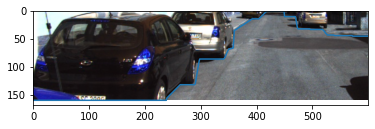

In [3]:
image = cv2.imread('data_road/processed_images/uu_000058_102.jpg')
label = np.load('data_road/processed_images/uu_road_000058_102.npy')

print(max(label))

plt.imshow(image)
plt.plot(label)